In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import QasmSimulator


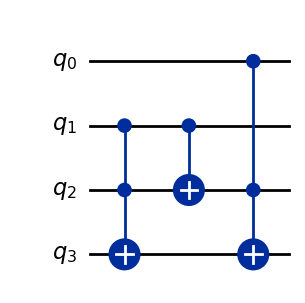

In [2]:
carry = QuantumCircuit(4)
carry.ccx(1, 2, 3)
carry.cx(1, 2)
carry.ccx(0, 2, 3)
carry.draw("mpl")

In [3]:
carry_gate = carry.to_gate()
rcarry_gate = carry_gate.reverse_ops()

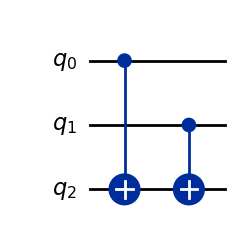

In [4]:
sum = QuantumCircuit(3)
sum.cx(0, 2)
sum.cx(1, 2)
sum.draw("mpl")

In [5]:
sum_gate = sum.to_gate()
rsum_gate = sum_gate.reverse_ops()

In [6]:
carry_gate.label = "carry"
rcarry_gate.label = "rcarry"
sum_gate.label = "sum"
rsum_gate.label = "rsum"

In [7]:
def buildAadder(bits, a, b):
    qc = QuantumCircuit(3 * bits + 1, bits + 1)
    
    

    for i in range(bits):
        if(a & 1):
            qc.x(i * 3 + 1)
        if(b & 1):
            qc.x(i * 3 + 2)
        a = a >> 1
        b = b >> 1

    # Find MSB
    index = 0
    for i in range(bits):
        qc.append(carry_gate, [index, index + 1, index + 2, index + 3])
        index = index + 3
    
    
    # Unset last operation
    index = index - 3
    qc.cx(index + 1, index + 2)
    qc.append(sum_gate, [index, index + 1, index + 2])
    
    
    # Find sum
    for i in range(bits - 1):
        index = index - 3
        qc.append(rcarry_gate, [index, index + 1, index + 2, index + 3])
        qc.append(sum_gate, [index, index + 1, index + 2])
    

    #measure
    qbits = list(range(2,3 * bits,3))
    qbits.append(3 * bits)
    qc.measure(qbits, list(range(bits + 1)))

    return qc




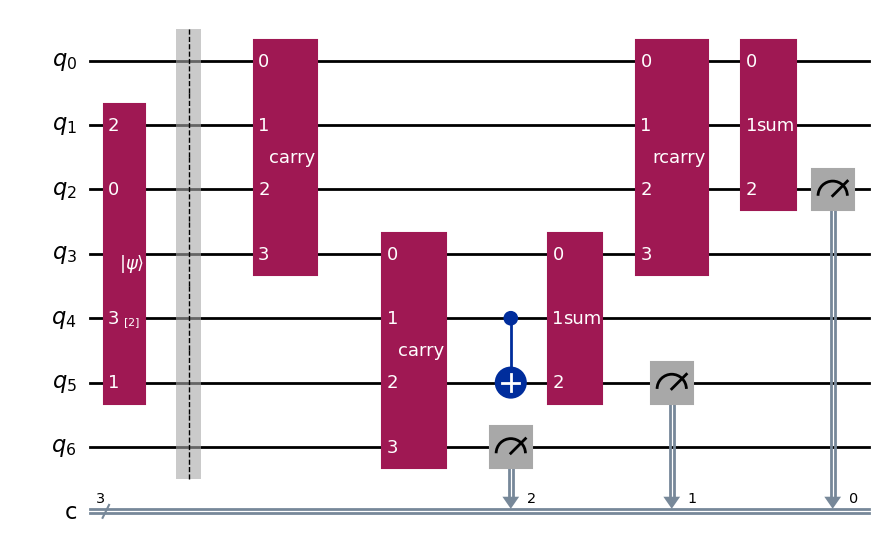

In [103]:

# adder = QuantumCircuit(7, 3)
# adder.initialize(2, [2, 5, 1, 4])
# adder.barrier()
# adder.append(carry_gate, [0, 1, 2, 3])
# adder.append(carry_gate, [3, 4, 5, 6])
# adder.cx(4, 5)
# adder.append(sum_gate, [3, 4, 5])
# adder.append(rcarry_gate, [0, 1, 2, 3])
# adder.append(sum_gate, [0, 1, 2])
# adder.measure([2, 5, 6], [0, 1, 2])
# adder.draw("mpl")

In [ ]:
#to test one combination

bits = 2
i = 1
j = 2
adder = buildAadder(bits , i, j)
sim = QasmSimulator()
adder = adder.decompose(reps=2)
result = sim.run(adder, shots = 1).result()
result = result.get_counts().most_frequent()





#to test every  possible combinations 
validate = "True"
bits = 2
for i in range(pow(2, bits)):
    for j in range(i,pow(2, bits)):    
        adder = buildAadder(bits , i, j)
        sim = QasmSimulator()
        adder = adder.decompose(reps=2)

        result = sim.run(adder, shots = 1).result()
        result = result.get_counts().most_frequent()

        if ((i + j) != int(result, 2)):
            validate = "False"
            break

print(validate)

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit_ibm_runtime.transpiler.passes.scheduling import (
    ASAPScheduleAnalysis,
    PadDynamicalDecoupling,
)
 
# If you have not previously saved your credentials, follow instructions at
# https://docs.quantum.ibm.com/guides/setup-channel#iqp
# to authenticate with your API token.
service = QiskitRuntimeService(channel="ibm_quantum", token="b8e4542f8f1728ac3463a50ecc8a3739a663a9f9ac08b86a6af9ea4f57af9ad1e21bc8a7a5dae2d0a2134aa414c8ab736ab59702d4040c3ded66f3d5ae1b55f6")

In [77]:
from qiskit.circuit.library import HalfAdderGate
cir = QuantumCircuit(9);
cir.x([1, 4])
cir.append(HalfAdderGate(4), [0, 1, 2, 3, 4,5,6,7,8])
#cir = cir.decompose()
cir.measure_all()
cir.draw()

┌────────────┐ ░ ┌─┐                        
   q_0: ─────┤0           ├─░─┤M├────────────────────────
        ┌───┐│            │ ░ └╥┘┌─┐                     
   q_1: ┤ X ├┤1           ├─░──╫─┤M├─────────────────────
        └───┘│            │ ░  ║ └╥┘┌─┐                  
   q_2: ─────┤2           ├─░──╫──╫─┤M├──────────────────
             │            │ ░  ║  ║ └╥┘┌─┐               
   q_3: ─────┤3           ├─░──╫──╫──╫─┤M├───────────────
        ┌───┐│            │ ░  ║  ║  ║ └╥┘┌─┐            
   q_4: ┤ X ├┤4 Halfadder ├─░──╫──╫──╫──╫─┤M├────────────
        └───┘│            │ ░  ║  ║  ║  ║ └╥┘┌─┐         
   q_5: ─────┤5           ├─░──╫──╫──╫──╫──╫─┤M├─────────
             │            │ ░  ║  ║  ║  ║  ║ └╥┘┌─┐      
   q_6: ─────┤6           ├─░──╫──╫──╫──╫──╫──╫─┤M├──────
             │            │ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_7: ─────┤7           ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├───
             │            │ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_8: ─────┤8           ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
             └────────────┘ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 9/═══════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩═
                               0  1  2  3  4  5  6  7  8

In [78]:
from qiskit.circuit.library import XGate
backend = service.least_busy(simulator=False, operational=True)

# Convert to an ISA circuit and layout-mapped observables.
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
# isa_circuit = pm.run(row_circuit)
# Get gate durations so the transpiler knows how long each operation takes
bits = 2
i = 1
j = 2
adder = buildAadder(bits , i, j)
print(adder.draw())
adder = adder.decompose(reps=2)

pm = generate_preset_pass_manager(3, backend=backend)
t_rc = pm.run(cir)


durations = InstructionDurations().from_backend(backend)

# This is the sequence we'll apply to idling qubits
dd_sequence = [XGate(), XGate()]
pm = PassManager([ASAPScheduleAnalysis(durations), PadDynamicalDecoupling(durations, dd_sequence)])
isa_circuit = pm.run(t_rc)
# isa_circuit.draw("mpl", idle_wires=False)

          ┌────────┐                       ┌─────────┐┌──────┐   
q_0: ─────┤0       ├───────────────────────┤0        ├┤0     ├───
     ┌───┐│        │                       │         ││      │   
q_1: ┤ X ├┤1       ├───────────────────────┤1        ├┤1 sum ├───
     └───┘│  carry │                       │  rcarry ││      │┌─┐
q_2: ─────┤2       ├───────────────────────┤2        ├┤2     ├┤M├
          │        │┌────────┐     ┌──────┐│         │└──────┘└╥┘
q_3: ─────┤3       ├┤0       ├─────┤0     ├┤3        ├─────────╫─
          └────────┘│        │     │      │└─────────┘         ║ 
q_4: ───────────────┤1       ├──■──┤1 sum ├────────────────────╫─
     ┌───┐          │  carry │┌─┴─┐│      │    ┌─┐             ║ 
q_5: ┤ X ├──────────┤2       ├┤ X ├┤2     ├────┤M├─────────────╫─
     └───┘          │        │└┬─┬┘└──────┘    └╥┘             ║ 
q_6: ───────────────┤3       ├─┤M├──────────────╫──────────────╫─
                    └────────┘ └╥┘              ║              ║ 
c: 3/═════

In [79]:
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=16000)

In [80]:
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
# counts = job.result()[0].data.meas.get_counts()

In [85]:
job_result[0].data.meas.get_counts()

{'000010010': 398,
 '000110010': 1866,
 '010011010': 88,
 '100100011': 57,
 '001110010': 300,
 '001011011': 15,
 '110111010': 288,
 '011110010': 204,
 '110110011': 189,
 '010110010': 358,
 '000111011': 67,
 '010101110': 8,
 '000110011': 519,
 '111001011': 18,
 '111111010': 106,
 '101110101': 2,
 '111010011': 34,
 '110000011': 24,
 '111000111': 5,
 '111011011': 15,
 '101110010': 266,
 '110110000': 62,
 '010111010': 614,
 '101010111': 5,
 '011011010': 67,
 '011010010': 84,
 '000010000': 27,
 '000100110': 39,
 '100001110': 2,
 '101001111': 4,
 '000010011': 106,
 '100111110': 19,
 '110101111': 4,
 '100110010': 753,
 '111110011': 88,
 '010110111': 9,
 '110110010': 573,
 '101000110': 7,
 '001111010': 76,
 '000100010': 325,
 '100100010': 149,
 '100111010': 133,
 '111010010': 121,
 '000111010': 246,
 '100110011': 257,
 '010111011': 169,
 '010100011': 27,
 '010010110': 10,
 '110011010': 44,
 '001101011': 26,
 '011111011': 47,
 '001011010': 52,
 '100100110': 20,
 '110110110': 66,
 '101110001': 9

In [50]:
adder.draw()

»
q_0: ─────────────────────────────────────────────────────────────────────────»
     ┌──────────┐                                             ┌───┐           »
q_1: ┤ U(π,0,π) ├──────────────■─────────────────────■────■───┤ T ├───■────■──»
     └──────────┘              │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐┌─┴─┐»
q_2: ──────────────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├┤ X ├»
        ┌───┐    ┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘├───┤└───┘»
q_3: ───┤ H ├────┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├─┤ H ├─────»
        └───┘    └───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ ├───┤ └───┘     »
q_4: ──────────────────────────■─────────────────────■────■───┤ T ├───■────■──»
     ┌──────────┐              │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐┌─┴─┐»
q_5: ┤ U(π,0,π) ├──■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├┤ X ├»
     └──┬───┬───┘┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘├───┤└───┘»
q_6: ───┤ H ├────┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├─┤ H ├─────»
        └───┘    └───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘ └───┘     »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«                                                  ┌───┐                       »
«q_0: ──────────────■─────────────────────■────■───┤ T ├───■───────────────────»
«                   │                     │    │   └───┘   │                   »
«q_1: ──────────────┼─────────────────────┼────┼───────────┼───────────────────»
«                   │             ┌───┐   │  ┌─┴─┐┌─────┐┌─┴─┐                 »
«q_2: ──■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├─────────────────»
«     ┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘                 »
«q_3: ┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├───■───────────────────»
«     └───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘   │                   »
«q_4: ─────────────────────────────────────────────────────┼───────────────────»
«                                                          │             ┌───┐ »
«q_5: ──■──────────────────────────────────────────────────┼─────────■───┤ T ├─»
«     ┌─┴─┐┌─────┐                                       ┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐»
«q_6: ┤ X ├┤ Tdg ├───────────────────────────────────────┤ X ├┤ T ├┤ X ├┤ Tdg ├»
«     └───┘└─────┘                                       └───┘└───┘└───┘└─────┘»
«c: 3/═════════════════════════════════════════════════════════════════════════»
«                                                                              »
«                                                                            »
«q_0: ───────────────────────────────────────────────────■───────────────────»
«                                                        │                   »
«q_1: ───────────────────────────────────────────────────┼───────────────────»
«                                                        │             ┌───┐ »
«q_2: ───────────────────────────────────────■───────────┼─────────■───┤ T ├─»
«                ┌───┐                ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐»
«q_3: ──■────■───┤ T ├───■─────────■──┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├»
«       │    │   └───┘   │         │  └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘»
«q_4: ──┼────┼───────────┼────■────┼────■────────────────────────────────────»
«       │  ┌─┴─┐┌─────┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ┌─┐                              »
«q_5: ──┼──┤ X ├┤ Tdg ├┤ X ├┤ X ├┤ X ├┤ X ├─┤M├──────────────────────────────»
«     ┌─┴─┐├───┤└┬───┬┘└┬─┬┘└───┘└───┘└───┘ └╥┘                              »
«q_6: ┤ X ├┤ T ├─┤ H ├──┤M├──────────────────╫───────────────────────────────»
«     └───┘└───┘ └───┘  └╥┘                  ║                               »
«c: 3/═══════════════════╩═══════════════════╩═══════════════════════════════»
«                        2                   1                               

In [ ]:

sim = QasmSimulator()

result = sim.run(adder, shots = 1).result()
result = result.get_counts().most_frequent()